In [1]:
import pandas as pd
fname = "D:/Study PDF/Python/datasets/datasets/titanic.csv"
df = pd.read_csv(fname)

In [3]:
len(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 
1. PassengerID = serial ID 
2. Survived: 1=survived, 0=didn't survive
3. Pclass: passenger class
4. Name: Full name of the passenger
5. Age: age in years
6. Sibsp: #of sibling or spouses aboard the Titanic 
7. Parch: #of parents of children aboard the Titanic
8. Ticket: Ticket Number
9. Fare: Passenger fare
10. Cabin: cabin number
11. Embarked: port of embarkation(C = Cherbourg, Q= Queenstown, S=Southampton)

In [4]:
df.count() #check for the missing data

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
df['Age'].min(),df['Age'].max()

(0.42, 80.0)

In [9]:
df['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [11]:
df['Survived'].value_counts() * 100 / len(df) #converting into the percentage

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [13]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

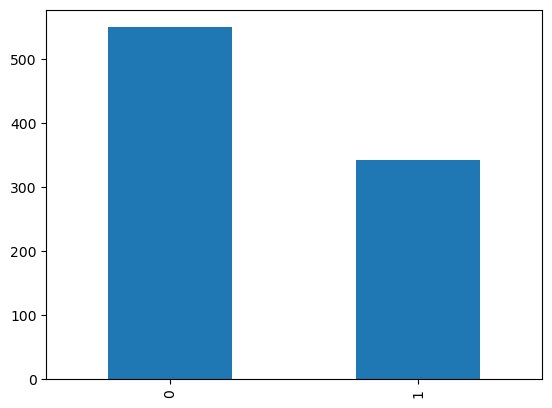

In [16]:
%matplotlib inline

alpha_color = 0.5

df['Survived'].value_counts().plot(kind = 'bar')

<Axes: >

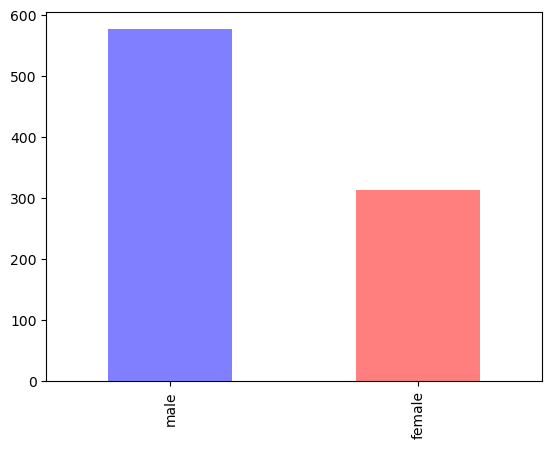

In [17]:
df['Sex'].value_counts().plot(kind='bar',
                             color=['b','r'],
                             alpha=alpha_color)

<Axes: >

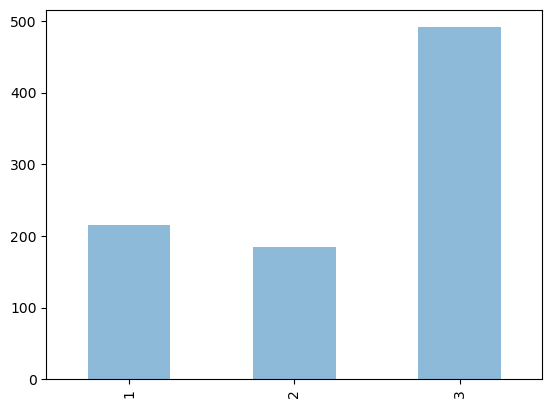

In [19]:
df['Pclass'].value_counts().sort_index().plot(kind='bar',
                                               alpha=alpha_color)

<Axes: xlabel='Survived', ylabel='Age'>

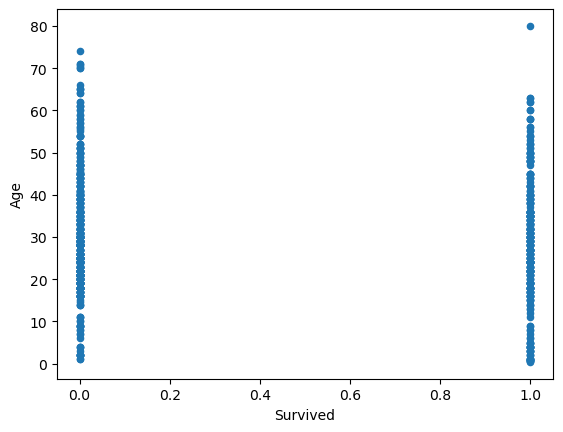

In [20]:
df.plot(kind='scatter', x='Survived',y='Age')

<Axes: >

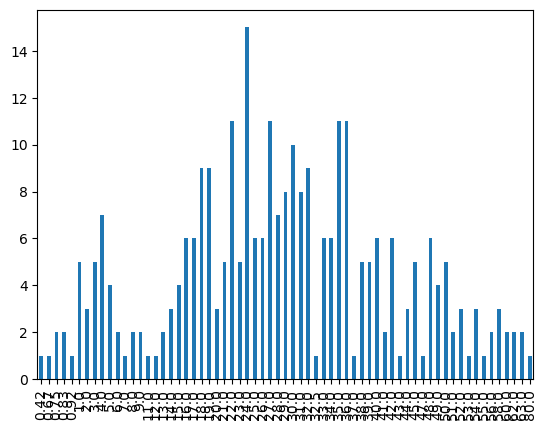

In [21]:
df[df['Survived'] == 1]['Age'].value_counts().sort_index().plot(kind='bar')

In [23]:
bins = [0,10,20,30,40,50,60,70,80]
df['AgeBin'] = pd.cut(df['Age'],bins)

<Axes: >

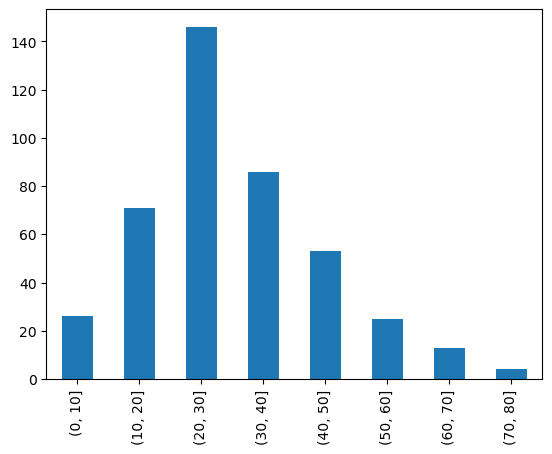

In [24]:
df[df['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<Axes: >

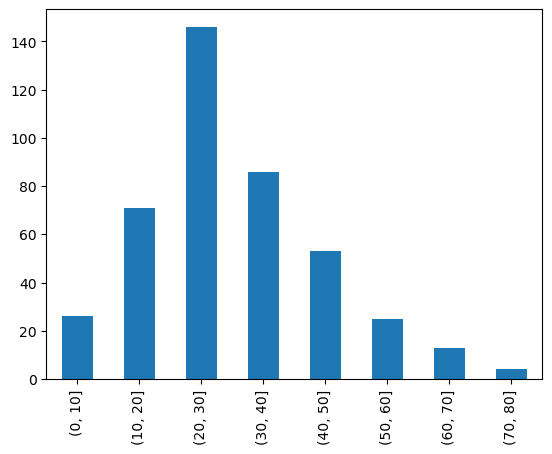

In [28]:
df[df['Survived'] == 0]['AgeBin'].value_counts().sort_index().plot(kind='bar')

<Axes: >

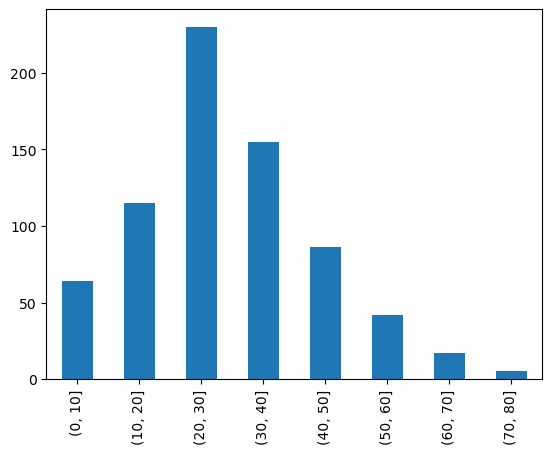

In [29]:
df['AgeBin'].value_counts().sort_index().plot(kind='bar')

<Axes: >

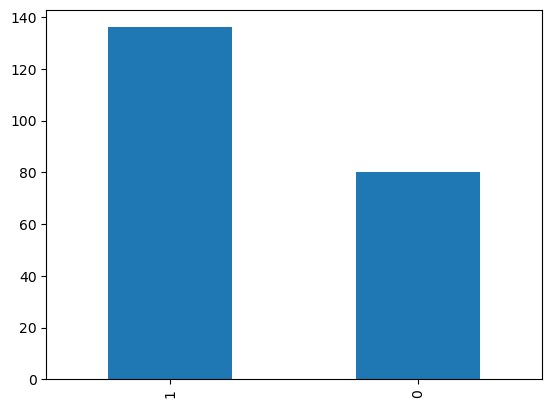

In [30]:
df[df['Pclass'] == 1]['Survived'].value_counts().plot(kind = 'bar')

<Axes: >

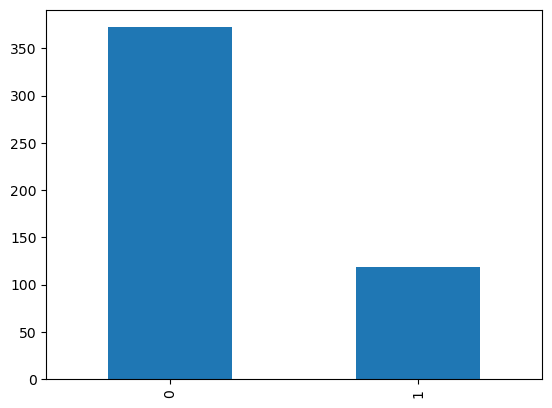

In [31]:
df[df['Pclass'] == 3]['Survived'].value_counts().plot(kind='bar')

<Axes: >

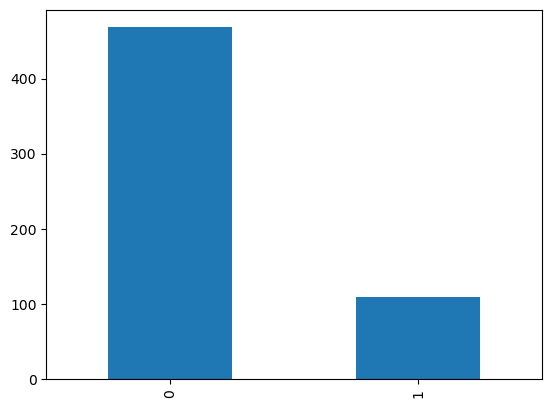

In [33]:
df[df['Sex'] == 'male']['Survived'].value_counts().plot(kind='bar')

<Axes: >

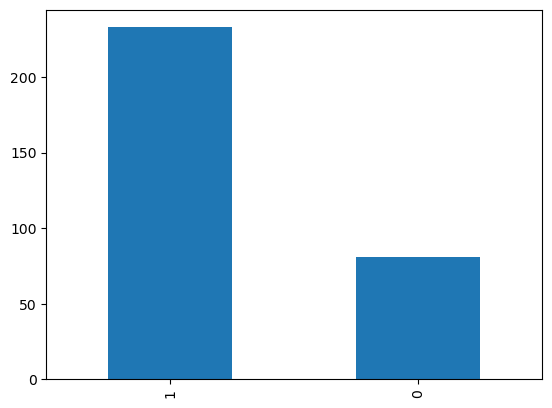

In [34]:
df[df['Sex'] == 'female']['Survived'].value_counts().plot(kind='bar')

<Axes: >

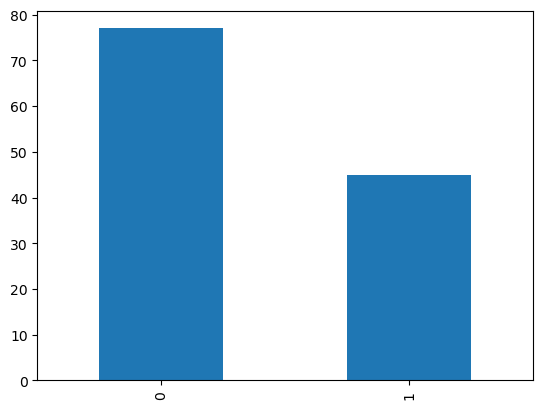

In [37]:
df[(df['Sex'] == 'male') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar') 

<Axes: >

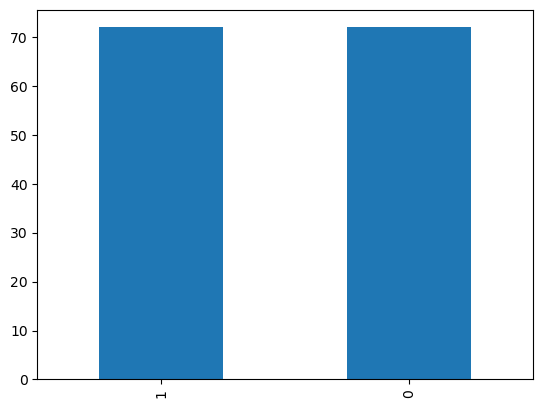

In [38]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

<Axes: >

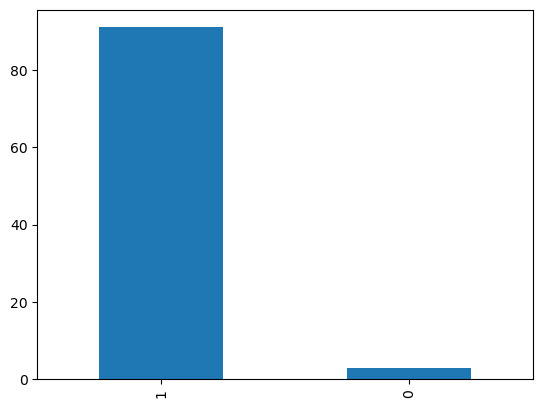

In [39]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

<Axes: >

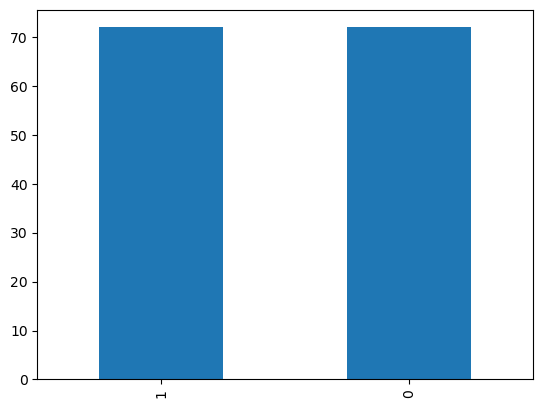

In [40]:
df[(df['Sex'] == 'female') & (df['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

### Supervised Learning with scikit-learn

In [1]:
import pandas as pd

In [2]:
fname = "D:/Study PDF/Python/datasets/datasets/titanic.csv"
data = pd.read_csv(fname)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['IsFemale'] =(data['Sex'] == 'female')
samples = data[['IsFemale']] #x
labels = data['Survived'] #y

### Train/test split

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(samples,
                                                labels,
                                                train_size=0.7,
                                                random_state=0)
print("Samples: train={}, test={}".format(len(X_train),len(X_test)))

Samples: train=623, test=268


In [5]:
X_train['IsFemale'].value_counts()

False    408
True     215
Name: IsFemale, dtype: int64

### Dummy Classifier(most frequent class)

In [7]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train,Y_train)

DummyClassifier(strategy='most_frequent')

In [8]:
y_predicted = clf_dummy.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy={}'.format(accuracy_score(Y_test,y_predicted)))

Accuracy=0.6268656716417911


### Random forest classifer

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)

y_predicted = clf.predict(X_test)
print("Accuracy={}".format(accuracy_score(Y_test, y_predicted)))

Accuracy=0.7873134328358209


### Using more features

In [14]:
samples = data[['IsFemale','Pclass']]
labels = data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(samples,
                                                   labels,
                                                   train_size=0.7,
                                                   random_state=0)

In [15]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
y_predicted = clf.predict(X_test)
print("Accuracy={}".format(accuracy_score(Y_test,y_predicted)))

Accuracy=0.7873134328358209


In [16]:
data['AgeSentinel'] = data['Age'].fillna(-100)

In [20]:
features = ['IsFemale','Pclass','AgeSentinel']
samples = data[features]
labels = data['Survived']

X_train,X_test,Y_trian,Y_test = train_test_split(samples,
                                                labels,
                                                train_size=0.7,
                                                random_state=0)

In [23]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
y_predicted =clf.predict(X_test)
print("Accuracy={}".format(accuracy_score(Y_test,y_predicted)))

Accuracy=0.7686567164179104


In [24]:
features = ['IsFemale','Pclass','AgeSentinel','Fare']
samples = data[features]
labels = data['Survived']
X_train,X_test,Y_train,Y_test = train_test_split(samples,
                                                labels,
                                                train_size=0.7,
                                                random_state=0)

In [25]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
y_predicted = clf.predict(X_test)
print("Accuracy={}".format(accuracy_score(Y_test,y_predicted)))

Accuracy=0.8134328358208955


In [27]:
data['FamilySize'] = data['SibSp'] + data['Parch']
features = ['IsFemale','Pclass','AgeSentinel','Fare','FamilySize']
samples  = data[features]
labels  =data['Survived']

X_train,X_test,Y_train,Y_test = train_test_split(samples,
                                                labels,
                                                train_size = 0.7,
                                                random_state = 0)

In [30]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train,Y_train)
y_predicted = clf.predict(X_test)
print("Accuracy={}".format(accuracy_score(Y_test,y_predicted)))

Accuracy=0.8022388059701493


### Feature importance

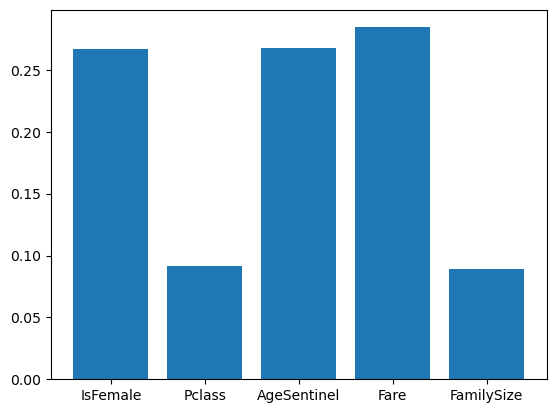

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(features)),clf.feature_importances_,tick_label=features)
plt.show()